In [1]:
# install.packages("ggplot2")
library(ggplot2)

In [2]:
data(ChickWeight)
head(ChickWeight)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


In [26]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [54]:
data(economics)
head(economics)

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


# 1. 그래프 종류

## [1] 선 그래프(line Graph)
시간의 흐름에 따른 등락을 보기 쉽기 때문에 주로 시계열 지표에서 많이 쓰인다.

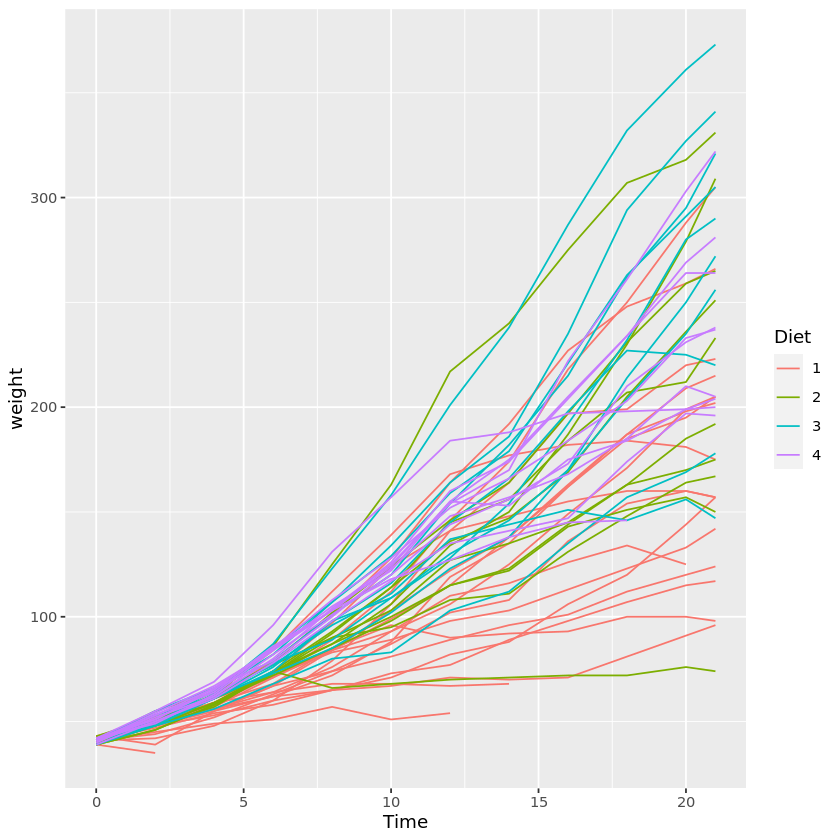

In [9]:
ggplot(ChickWeight, aes(x=Time, y=weight, colour=Diet, group=Chick)) + 
    geom_line()
# Diet 별로 색상 부여
# Chick 별로 데이터를 나누어 그래프로 그림

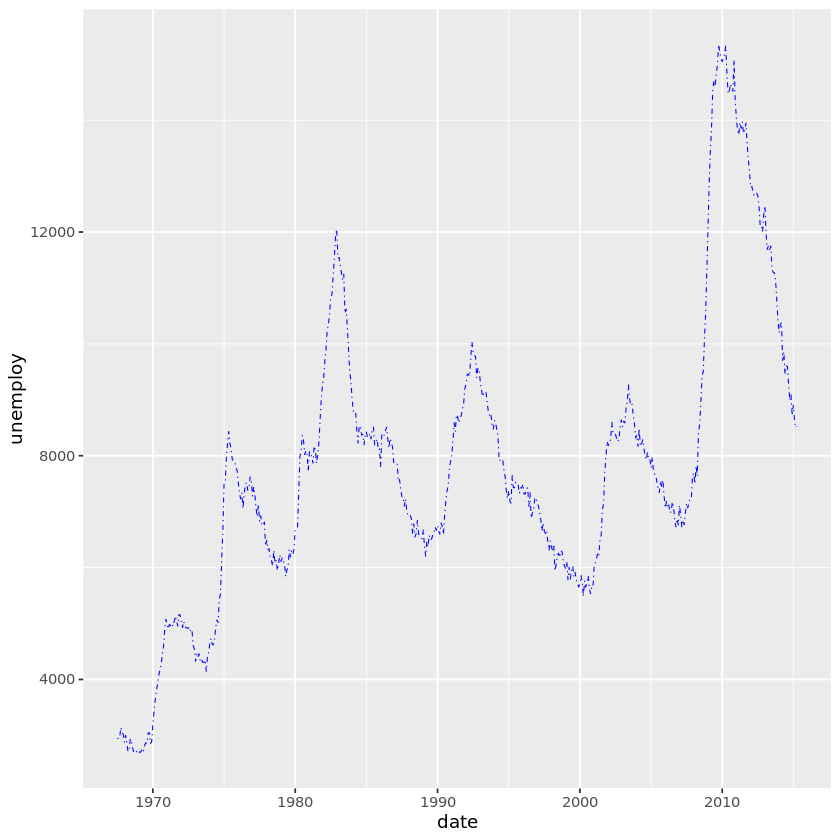

In [56]:
ggplot(data=economics, mapping=aes(x=date, y=unemploy)) +
geom_line(color="blue", size=0.3, linetype=4)

- color : 선의 색상
- size : 선의 굵기
- linetype : 선의 종류
    - 1 : 실선
    - 2 : 선이 긴 점선
    - 3 : 선이 짧은 점선
    - 4 : 길고 짧은 선이 반복

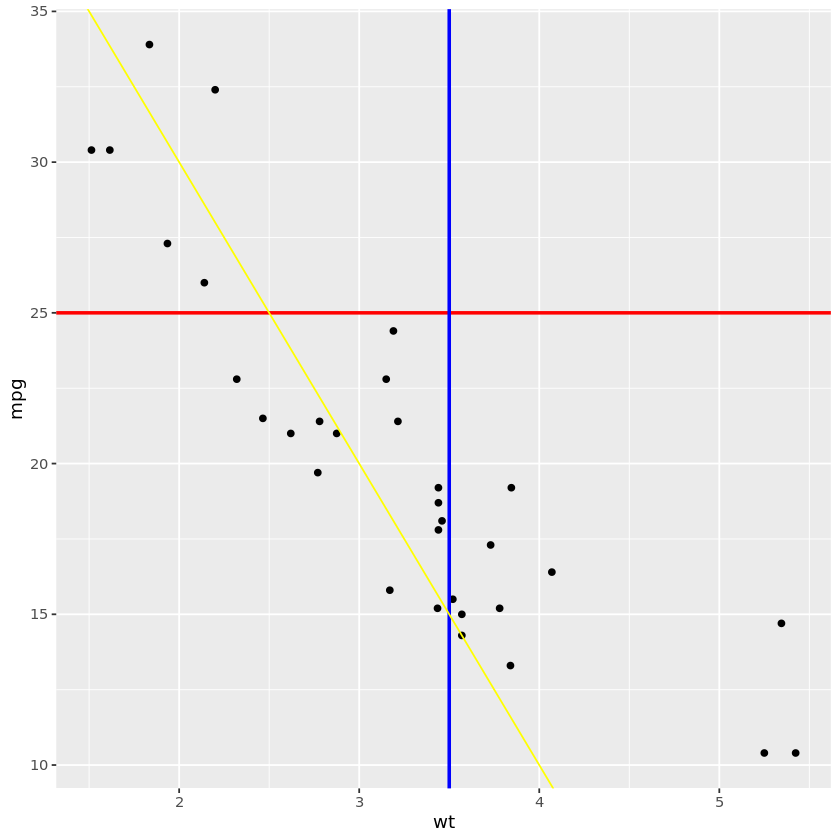

In [64]:
ggplot(mtcars, aes(wt, mpg)) +
geom_point() +
geom_hline(yintercept=25, size=1, color="red") +
geom_vline(xintercept=3.5, size=1, color="blue") + 
geom_abline(slope=-10, intercept=50, color="yellow")

- geom_hline : 갈

## [2] 점 그래프(Point Plot)

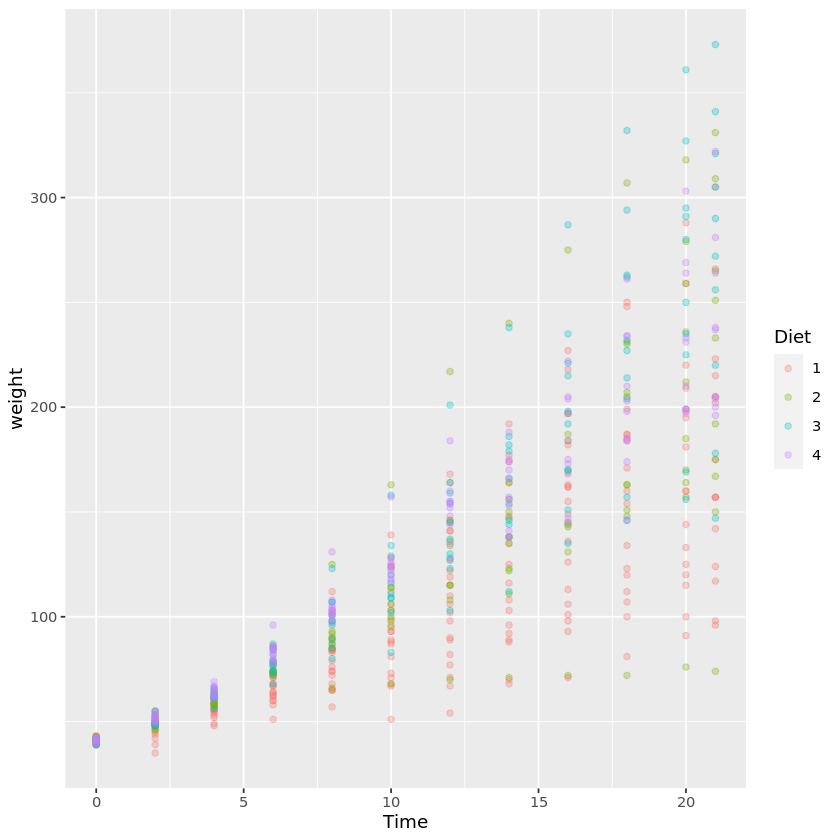

In [15]:
ggplot(ChickWeight, aes(x=Time, y=weight, color=Diet)) +
geom_point(alpha=0.3) # 점의 투명도를 조절

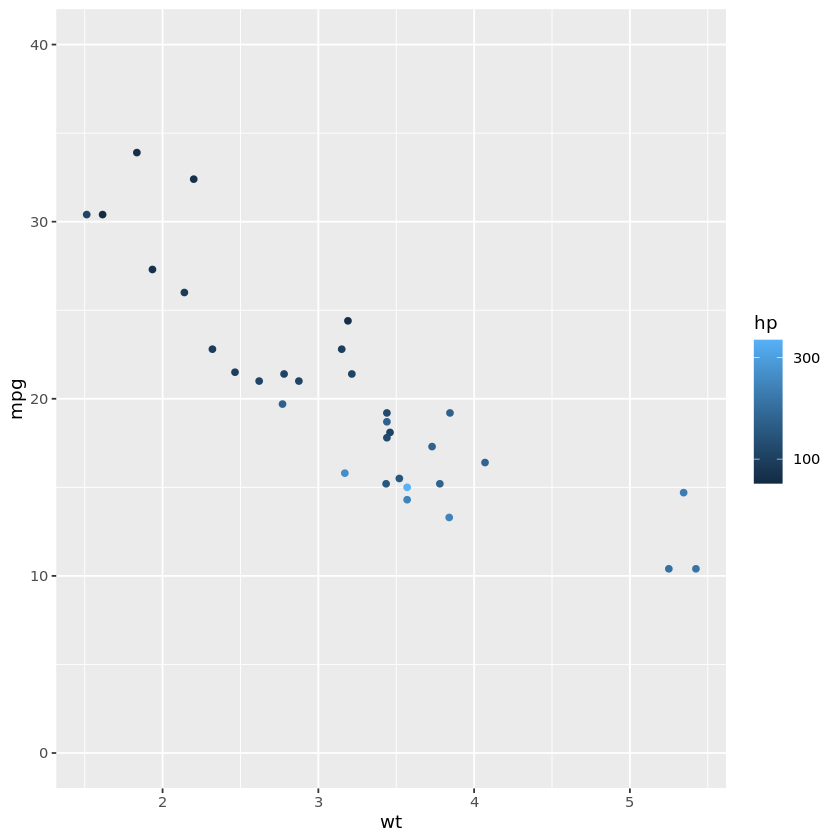

In [41]:
qplot(wt, mpg, color=hp, data=mtcars) + 
coord_cartesian(ylim=c(0,40)) + # 축의 범위를 설정 
scale_color_continuous(breaks=c(100, 300)) + # 색상의 범위를 100 ~ 300사이로 지정
guides(color="colorbar") # 수치에 따른 색상의 범위를 알려주는 막대를 추가

## [3] Smooth Graph

`geom_smooth()` using formula = 'y ~ x'


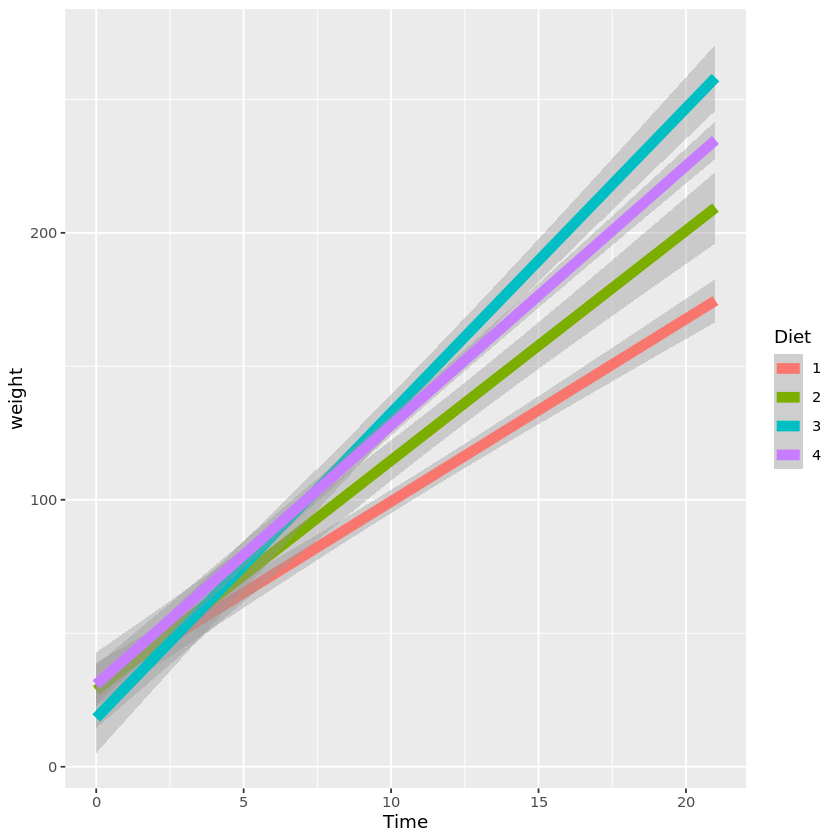

In [18]:
ggplot(ChickWeight, aes(x=Time, y=weight, color=Diet)) +
geom_smooth(alpha=0.4, size=3, method=lm)
# 단순 선형 회귀분석의 결과를 그래프로 그려준다.

## [4] 히스토그램(Histogram)
도수 분포표를 그래프로 나타낸 것으로, 분포가 연속적인 값이고 선으로 되어있어서 내용을 파악하기 어렵거난 분류유형이 많을 경우, 히스토그램을 사용해 쉽게 파악할 수 있다.

Warning message:
“In subset.data.frame(ChickWeight, Time = 21) :
 extra argument ‘Time’ will be disregarded”


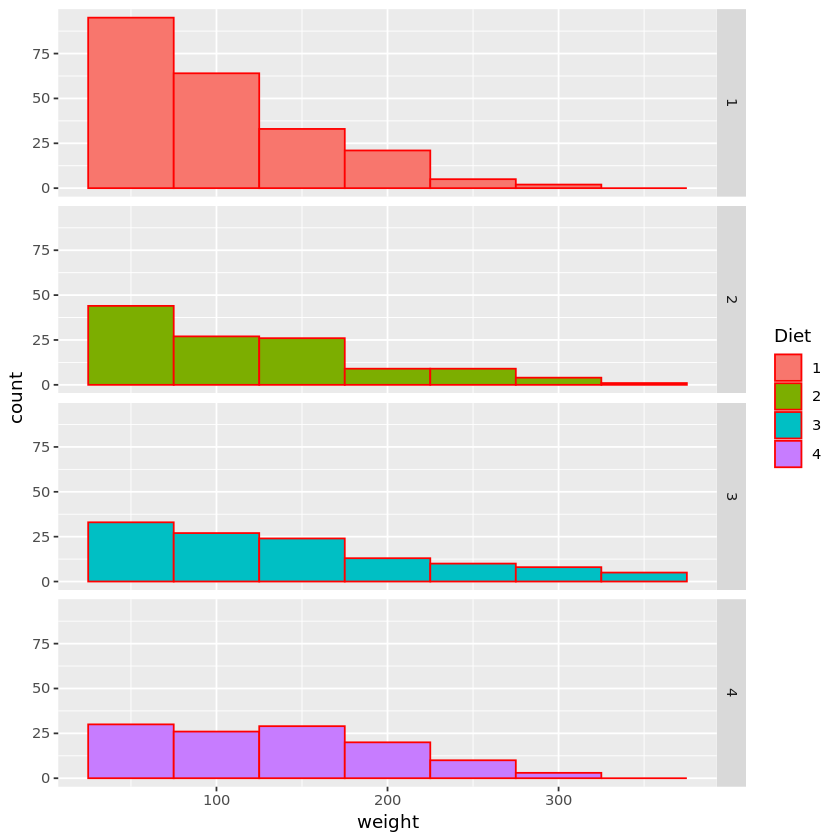

In [25]:
ggplot(data=subset(ChickWeight, Time=21), aes(x=weight, fill=Diet)) +
geom_histogram(color="red", binwidth=50) +
facet_grid(Diet ~ .) # Diet를 기준으로 그래프를 분할

- facet_grid : 그래프 formula를 기준으로 나눈다.
- binwidth : histogram을 그릴때 막대의 간격(가로)을 설정한다.
- bins : histogram을 그릴때 막대의 개수를 설정한다.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


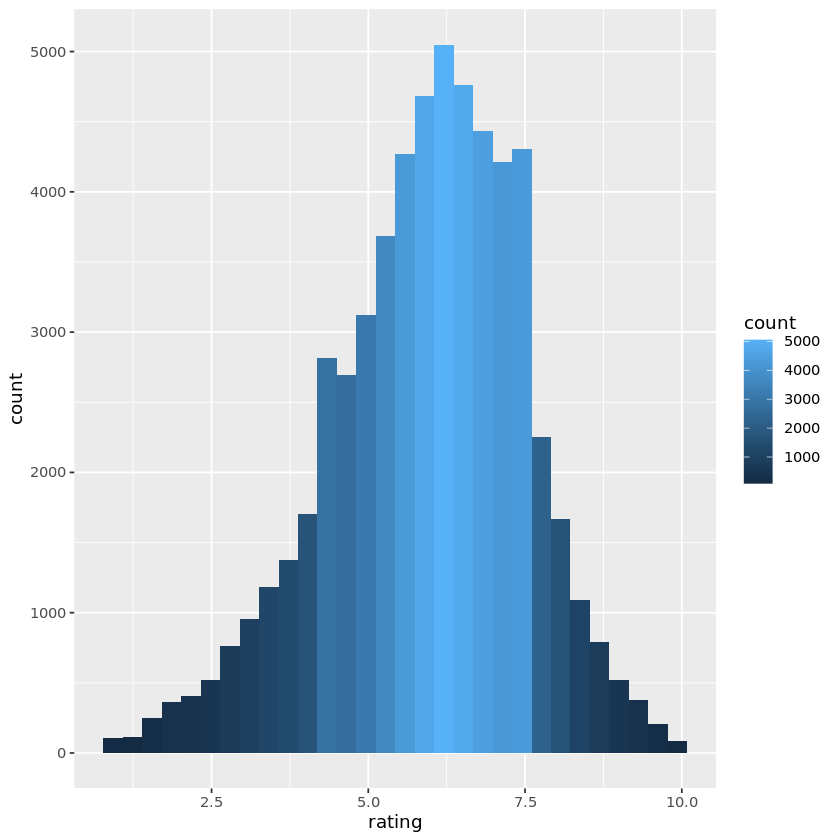

In [53]:
# install.packages("ggplot2movies")
library(ggplot2movies)
ggplot(movies, aes(x=rating)) + # factor 데이터 타입을 받는다.
geom_histogram() +
geom_histogram(aes(fill=..count..)) # histogram의 막대의 개수에 따라 색상을 부여

## [5] 막대 그래프(bar plot)

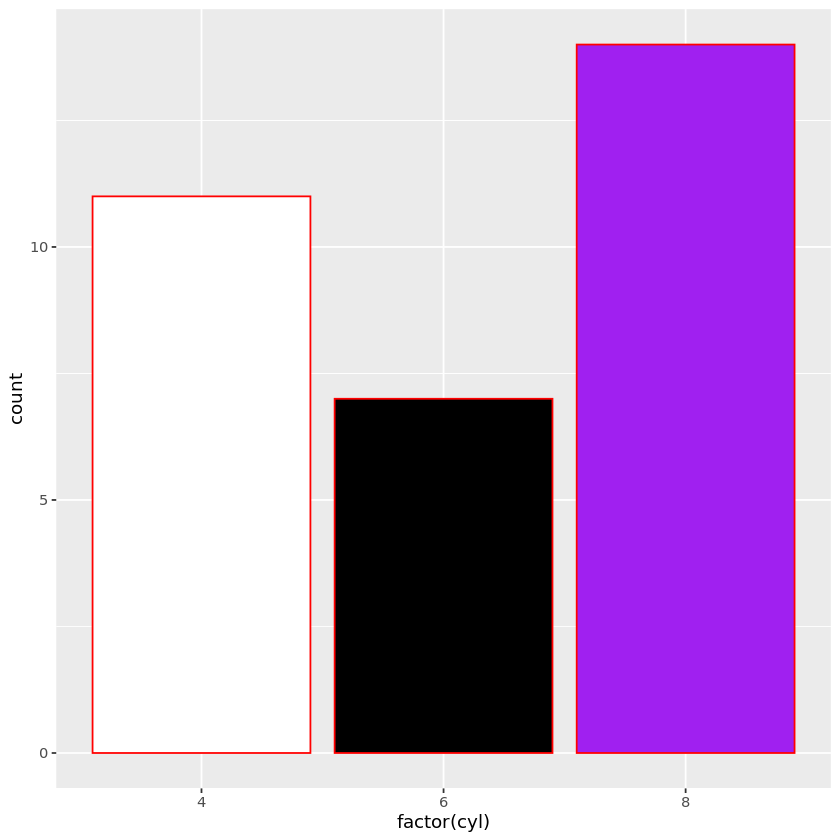

In [48]:
ggplot(mtcars, aes(factor(cyl))) + # factor 데이터 타입을 받는다.
geom_bar(fill=c("white", "black", "purple"), color="red" ) # 막대 그래프